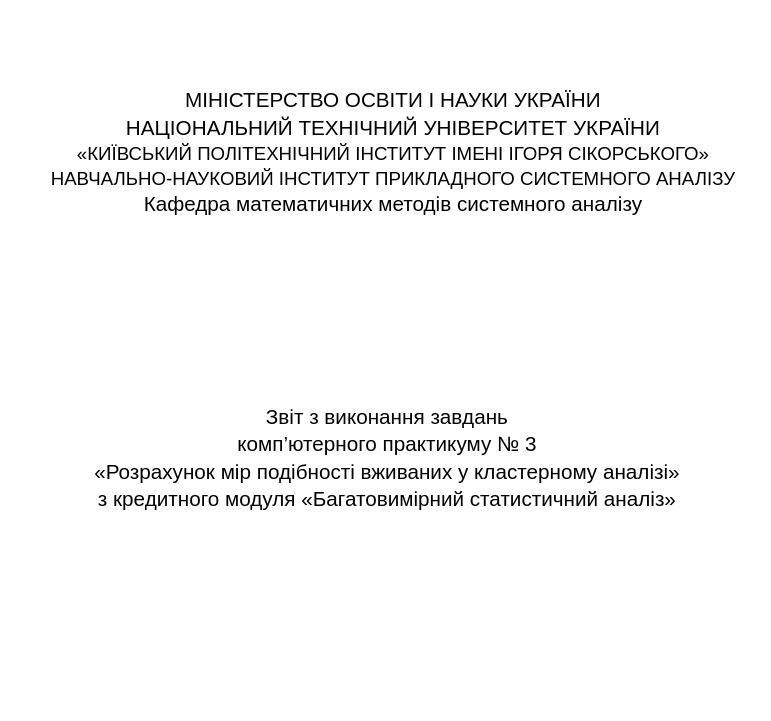

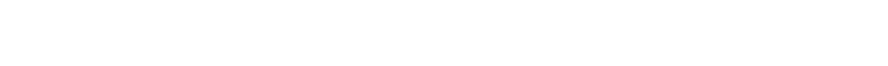

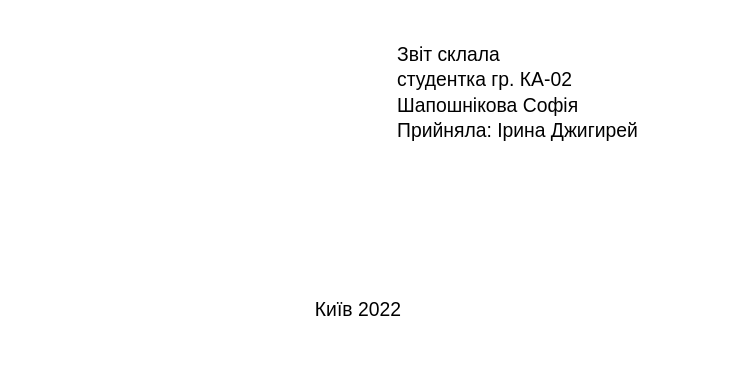

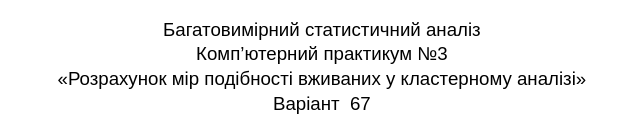

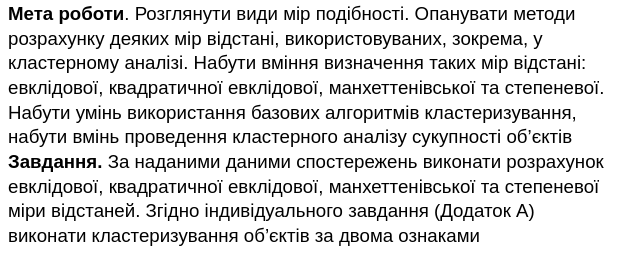

Підключимо небхідні бібліотеки:

In [151]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler

Отримаємо набір даних для завдань 1-3:

In [128]:
n=67
x = [2*n, 3*n,4*n,5*n,6*n]
y = [3*n, 3*n,1*n,2*n,2*n]
z = [1*n, 2*n,3*n,4*n,3*n]
task1_data = pd.DataFrame({'X' : x, 'Y': y, 'Z': z})
task1_data

,X,Y,Z
0,134,201,67
1,201,201,134
2,268,67,201
3,335,134,268
4,402,134,201


### 1. Розрахунок евклідової, квадратичної евклідової, манхеттенівської та степеневої (p = 2, r = 3) мір відстані для п’яти об’єктів (спостережень)

**Евклідова відстань**

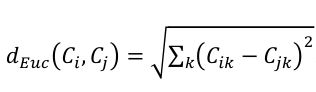

In [102]:
# Підключимо пакет для розрахунку Евклідової відстані
from sklearn.metrics.pairwise import euclidean_distances

eucl_dist = euclidean_distances(task1_data, task1_data, squared=False)

Отримали матрицю відстаней:

In [103]:
pd.DataFrame(eucl_dist)

,0,1,2,3,4
0,0.000000,94.752309,232.094808,292.046229,307.032572
1,94.752309,0.000000,164.115813,201.000000,222.213861
2,232.094808,164.115813,0.000000,116.047404,149.816554
3,292.046229,201.000000,116.047404,0.000000,94.752309
4,307.032572,222.213861,149.816554,94.752309,0.000000


Обчислимо Евклідову відстань самотужки для двох пар спостережень та спробуємо порівняти

In [41]:
np.sqrt(sum((task1_data.iloc[0] - task1_data.iloc[1])**2))

94.75230867899737

In [42]:
np.sqrt(sum((task1_data.iloc[0] - task1_data.iloc[2])**2))

232.09480821422954

Як бачимо, наші результати не відрізняються від результатів, отриманих з допмогою бібліотеки sklearn

**Квадратична евклідова відстань**

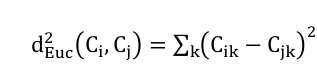

In [31]:
sq_eucl_dist = euclidean_distances(task1_data, task1_data, squared=True)

Отримали матрицю відстаней:

In [32]:
pd.DataFrame(sq_eucl_dist)

,0,1,2,3,4
0,0.0,8978.0,53868.0,85291.0,94269.0
1,8978.0,0.0,26934.0,40401.0,49379.0
2,53868.0,26934.0,0.0,13467.0,22445.0
3,85291.0,40401.0,13467.0,0.0,8978.0
4,94269.0,49379.0,22445.0,8978.0,0.0


Обчислимо квадратичну евклідову відстань самотужки для двох пар спостережень та спробуємо порівняти

In [44]:
sum((task1_data.iloc[0] - task1_data.iloc[1])**2)

8978

In [43]:
sum((task1_data.iloc[0] - task1_data.iloc[2])**2)

53868

Як бачимо, наші результати не відрізняються від результатів, отриманих з допмогою бібліотеки sklearn

**Манхетенська відстань**

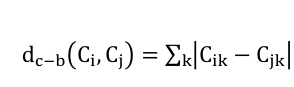

In [45]:
# Підключимо пакет для розрахунку Манхетенської відстані
from sklearn.metrics.pairwise import manhattan_distances

manh_dist = manhattan_distances(task1_data, task1_data)

Отримали матрицю відстаней:

In [46]:
pd.DataFrame(manh_dist)

,0,1,2,3,4
0,0.0,134.0,402.0,469.0,469.0
1,134.0,0.0,268.0,335.0,335.0
2,402.0,268.0,0.0,201.0,201.0
3,469.0,335.0,201.0,0.0,134.0
4,469.0,335.0,201.0,134.0,0.0


Обчислимо матехетенську відстань самотужки для двох пар спостережень та спробуємо порівняти

In [48]:
sum(abs(val1-val2) for val1, val2 in zip(task1_data.iloc[0],task1_data.iloc[1]))

134

In [49]:
sum(abs(val1-val2) for val1, val2 in zip(task1_data.iloc[0],task1_data.iloc[2]))

402

Як бачимо, наші результати не відрізняються від результатів, отриманих з допмогою бібліотеки sklearn

**Степенева відстань: p=2, r=3**

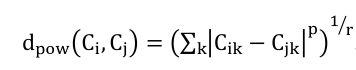

In [111]:
p=2
r=3

Обчислимо степеневу відстань для двох пар спостережень:

In [112]:
(sum((abs(task1_data.iloc[0] - task1_data.iloc[1]))**p))**1/r

2992.6666666666665

In [113]:
(sum((abs(task1_data.iloc[0] - task1_data.iloc[2]))**p))**1/r

17956.0

Тепер створимо функцію, яка допоможе обчислити відстані між усіма комбінаціями:

In [114]:
from itertools import combinations

In [183]:
def calculate_power_dist_matr(df, p, r):
    power_dists = {}
    combs = list(combinations(df.T.columns, 2))[:10]
    
    for i,j in combs:
        pow_dist=(sum((abs(df.iloc[i] - df.iloc[j]))**p))**1/r
        power_dists[i, j] = pow_dist
        power_dists[j, i] = pow_dist
        
    for i in range(len(df)):
        power_dists[i,i] = 0
    dist_matr = np.empty((len(df),len(df)))
    
    for i, j in sorted(power_dists.keys()):
        dist_matr[i,j] = power_dists[i,j]
    
    return dist_matr

Отримуємо матрицю відстаней:

In [116]:
pd.DataFrame(calculate_power_dist_matr(task1_data, 2, 3))

,0,1,2,3,4
0,0.000000,2992.666667,17956.000000,28430.333333,31423.000000
1,2992.666667,0.000000,8978.000000,13467.000000,16459.666667
2,17956.000000,8978.000000,0.000000,4489.000000,7481.666667
3,28430.333333,13467.000000,4489.000000,0.000000,2992.666667
4,31423.000000,16459.666667,7481.666667,2992.666667,0.000000


### 2. Кластеризування методом середнього зв'язку, використовуючи послідовно усі вказані види мір відстаней; 3. Виконати аналіз отриманих результатів

**Матриця діаграми розсіювання**

Подивимося, як розподілені дані та зробимо припущення про кластери:

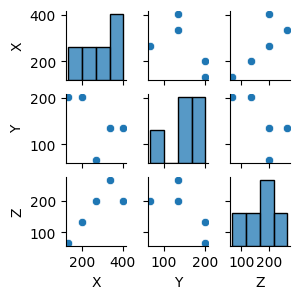

In [48]:
sns.pairplot(task1_data, height=1)

Як бачимо, дані не виражають чітких виділених кластерів

Тепер виконаємо кластеризування та побудуємо дендрограми:

*Я вирішила побудувати дендрограми для більшої к-ті відстаней, ніж вказано в завданні, щоб поспостерігати за їхніми властивостями*

In [ ]:
import scipy.cluster.hierarchy as shc

**Евклідова відстань**

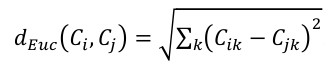

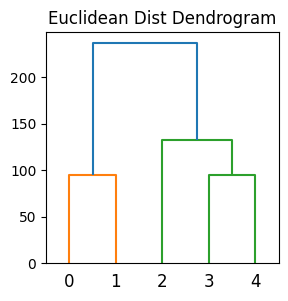

In [135]:
plt.figure(figsize=(3, 3))
plt.title("Euclidean Dist Dendrogram")

eucl_clusters = shc.linkage(task1_data, 
            method='average', # ’average’ - алгоритм середнього зв'язку
            metric="euclidean")
shc.dendrogram(Z=eucl_clusters)
plt.show()

**Квадратична евклідова відстань**

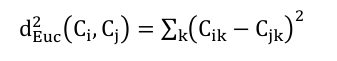

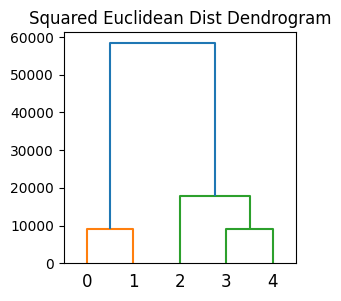

In [136]:
plt.figure(figsize=(3, 3))
plt.title("Squared Euclidean Dist Dendrogram")

sqeucl_clusters = shc.linkage(task1_data, 
            method='average', 
            metric='sqeuclidean')
shc.dendrogram(Z=sqeucl_clusters)
plt.show()

**Манхетенська відстань**

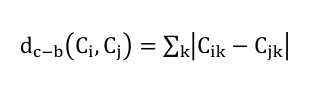

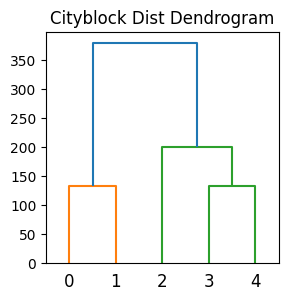

In [137]:
plt.figure(figsize=(3, 3))
plt.title("Cityblock Dist Dendrogram")

manh_clusters = shc.linkage(task1_data, 
            method='average', 
            metric='cityblock')
shc.dendrogram(Z=manh_clusters)
plt.show()

**Відстань Чебишева**

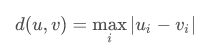

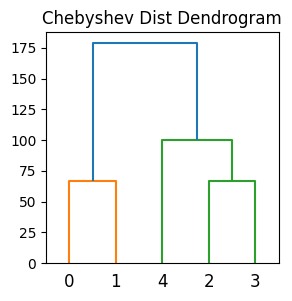

In [138]:
plt.figure(figsize=(3, 3))
plt.title("Chebyshev Dist Dendrogram")

cheb_clusters = shc.linkage(task1_data, 
            method='average', 
            metric='chebyshev')
shc.dendrogram(Z=cheb_clusters)
plt.show()

**Відстань Канберра**

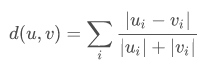

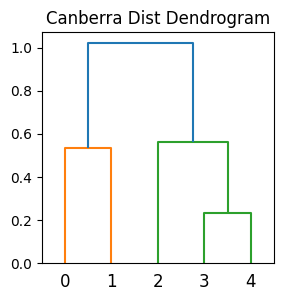

In [139]:
plt.figure(figsize=(3, 3))
plt.title("Canberra Dist Dendrogram")

canb_clusters = shc.linkage(task1_data, 
            method='average', 
            metric='canberra')
shc.dendrogram(Z=canb_clusters)
plt.show()

**Відстань Маланобіса**



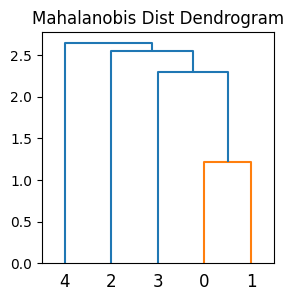

In [178]:
plt.figure(figsize=(3, 3))
plt.title("Mahalanobis Dist Dendrogram")

mal_clusters = shc.linkage(task1_data, 
            method='average', 
            metric='mahalanobis')
shc.dendrogram(Z=mal_clusters)
plt.show()

**Степенева відстань: p=2, r=3**

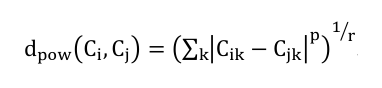

Оскільки реалізованої функції для степеневої відстані немає, будемо реалізовуватии власну:

In [92]:
powerdist_p2_r3 = lambda x,y: (sum((abs(x- y))**2))**1/3

Тепер можемо реалізовувати кластеризацію:

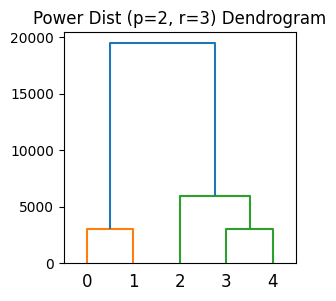

In [141]:
plt.figure(figsize=(3, 3))
plt.title("Power Dist (p=2, r=3) Dendrogram")

powerdist_p2_r3_clusters = shc.linkage(task1_data, 
            method='average', 
            metric=powerdist_p2_r3)
shc.dendrogram(Z=powerdist_p2_r3_clusters)
plt.show()

Глянемо на матрицю відстаней, отриману для степеневої відстані та кластери, утворені з урахуванням степеневої відстані:

In [142]:
# матриця відстаней для степеневої відстані з p=2, r=3
pd.DataFrame(calculate_power_dist_matr(task1_data, 2, 3))

,0,1,2,3,4
0,0.000000,2992.666667,17956.000000,28430.333333,31423.000000
1,2992.666667,0.000000,8978.000000,13467.000000,16459.666667
2,17956.000000,8978.000000,0.000000,4489.000000,7481.666667
3,28430.333333,13467.000000,4489.000000,0.000000,2992.666667
4,31423.000000,16459.666667,7481.666667,2992.666667,0.000000


In [143]:
# матриця кластерів, утворених з використанням степеневої відстані з p=2, r=3
pd.DataFrame(powerdist_p2_r3_clusters)

,0,1,2,3
0,0.0,1.0,2992.666667,2.0
1,3.0,4.0,2992.666667,2.0
2,2.0,6.0,5985.333333,3.0
3,5.0,7.0,19452.333333,5.0


### 4. Виконати кластеризування об’єктів методом «близького сусіди» для вихідних (Додаток А) і нормованих даних

Отримаємо набір даних для варіанту 67:

In [125]:
x = [6.38, 8.8, 6.37, 8.57, 8.84, 6.88, 8.65, 6.74, 8.51, 8.7, 6.51, 8.87, 7.27, 8.67, 22.99, 23.02, 22.8, 22.54, 23.25, 22.81]
y = [265.9, 272.43, 270.34, 278.92, 261.1, 270.62, 276.2, 265.1, 263.34, 277.14, 272.82, 275.09, 275.3, 267.79, 431.91, 421.10, 423.12, 429.84, 426.73, 423.15]
task4_data = pd.DataFrame({'X' : x, 'Y': y})

In [170]:
task4_data

,X,Y
0,6.38,265.90
1,8.80,272.43
2,6.37,270.34
3,8.57,278.92
4,8.84,261.10
5,6.88,270.62
6,8.65,276.20
7,6.74,265.10
8,8.51,263.34
9,8.70,277.14


Тепер виконаємо стандартизацію даних:

In [152]:
scaler = StandardScaler()

In [153]:
task4_data_norm = task4_data.copy()

In [154]:
task4_data_norm["X"] = scaler.fit_transform(np.array(task4_data_norm ["X"]).reshape(-1, 1))
task4_data_norm["Y"] = scaler.fit_transform(np.array(task4_data_norm ["Y"]).reshape(-1, 1))

Отже, отримали дані, розподілені за стандартним нормальним розподілом:

In [159]:
round(task4_data_norm.mean(axis=0))

X    0.0
Y   -0.0
dtype: float64

In [160]:
round(task4_data_norm.std(axis=0))

X    1.0
Y    1.0
dtype: float64

**Матриця діаграми розсіювання**

Подивимося, як розподілені дані та зробимо припущення про кластери:

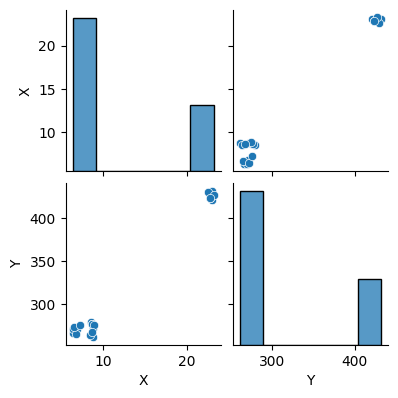

In [132]:
sns.pairplot(task4_data, height=2)

Бачимо чітко виділені 2 кластери та нечітко відділені між собою 3

**Кластеризування методом "близького сусіди" для вихідних даних з використанням евклідової відстані** 

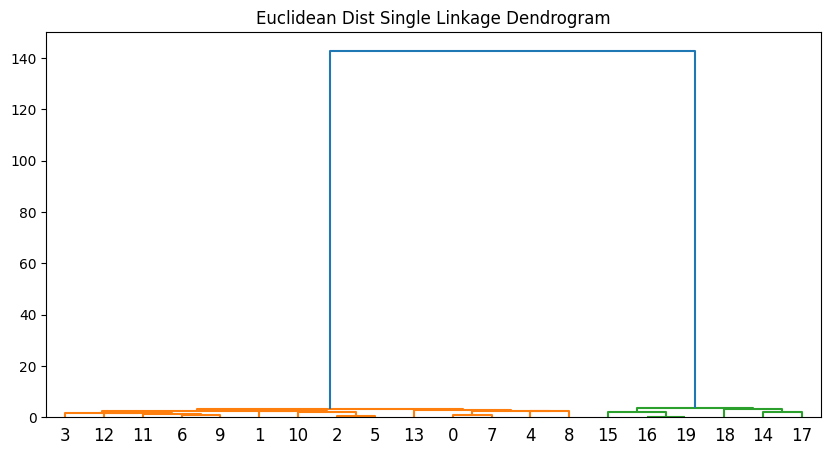

In [177]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean Dist Single Linkage Dendrogram")

eucl_clusters = shc.linkage(task4_data, 
            method='single', # ’single’ - алгоритм "близького сусіди"
            metric="euclidean")
shc.dendrogram(Z=eucl_clusters)
plt.show()

**Кластеризування методом "близького сусіди" для нормованих даних з використанням евклідової відстані**

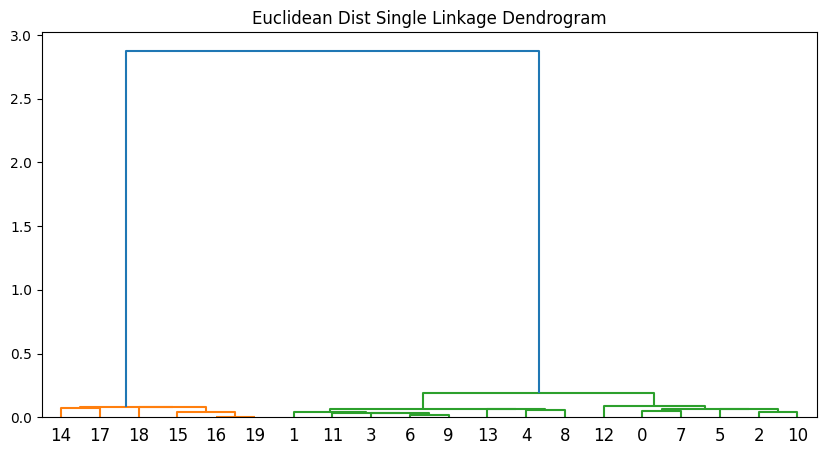

In [176]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean Dist Single Linkage Dendrogram")

eucl_clusters = shc.linkage(task4_data_norm, 
            method='single', # ’single’ - алгоритм "близького сусіди"
            metric="euclidean")
shc.dendrogram(Z=eucl_clusters)
plt.show()

### 5. Виконати кластеризування об’єктів методом «далекого сусіди» для вихідних і нормованих даних. Тип відстані використати такий самий як і у п. 4.

**Кластеризування методом "далекого сусіди" для вихідних даних з використанням евклідової відстані**

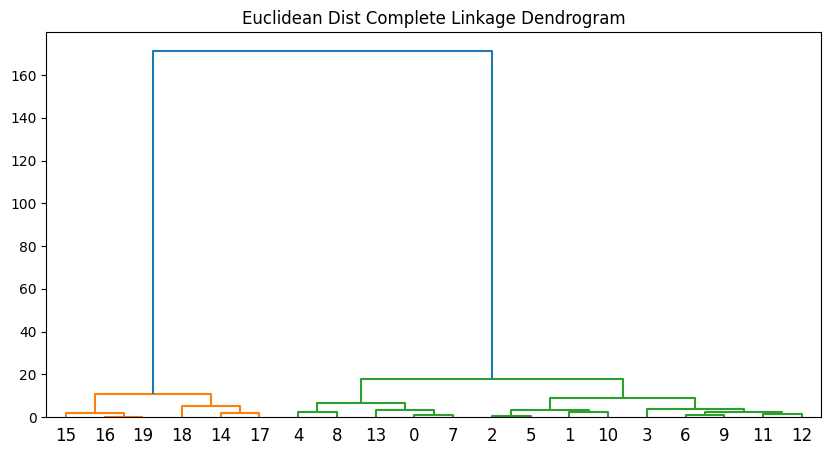

In [175]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean Dist Complete Linkage Dendrogram")

eucl_clusters = shc.linkage(task4_data, 
            method='complete', # ’complete’ - алгоритм "далекого сусіди"
            metric="euclidean")
shc.dendrogram(Z=eucl_clusters)
plt.show()

**Кластеризування методом "далекого сусіди" для нормованих даних з використанням евклідової відстані**

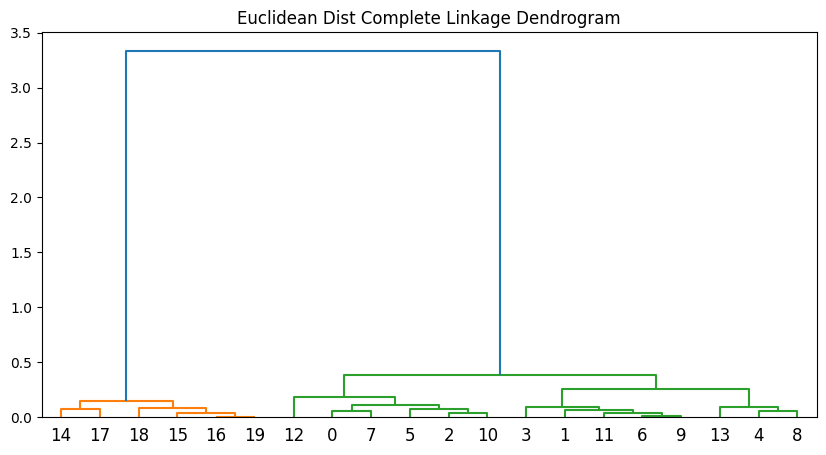

In [174]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean Dist Complete Linkage Dendrogram")

eucl_clusters = shc.linkage(task4_data_norm, 
            method='complete', # ’complete’ - алгоритм "далекого сусіди"
            metric="euclidean")
shc.dendrogram(Z=eucl_clusters)
plt.show()

### 6. Виконати кластеризування об’єктів методом «близького сусіди» або «далекого сусіди» (для вихідних або нормованих даних) з використанням іншого типу відстані ніж у задачах з пп. 4 та 5 послідовності виконання ; 7. Виконати аналіз отриманих результатів

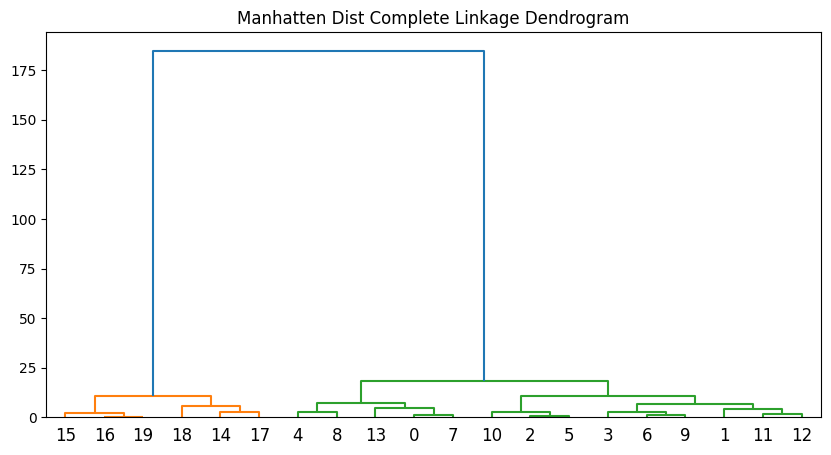

In [181]:
plt.figure(figsize=(10, 5))
plt.title("Manhatten Dist Complete Linkage Dendrogram")

manh_clusters = shc.linkage(task4_data, 
            method='complete', # 'complete' - алгоритм "далекого сусіди"
            metric="cityblock") # "cityblock" - Манхетенська відстань (відстань міських кварталів)
shc.dendrogram(Z=manh_clusters)
plt.show()

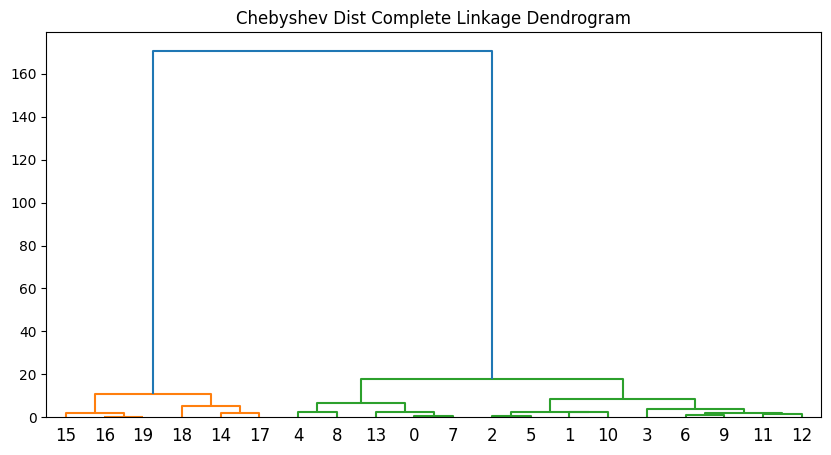

In [182]:
plt.figure(figsize=(10, 5))
plt.title("Chebyshev Dist Complete Linkage Dendrogram")

ch_clusters = shc.linkage(task4_data, 
            method='complete', # 'complete' - алгоритм "далекого сусіди"
            metric='chebyshev') # 'chebyshev' - відстань Чебишева
shc.dendrogram(Z=ch_clusters)
plt.show()

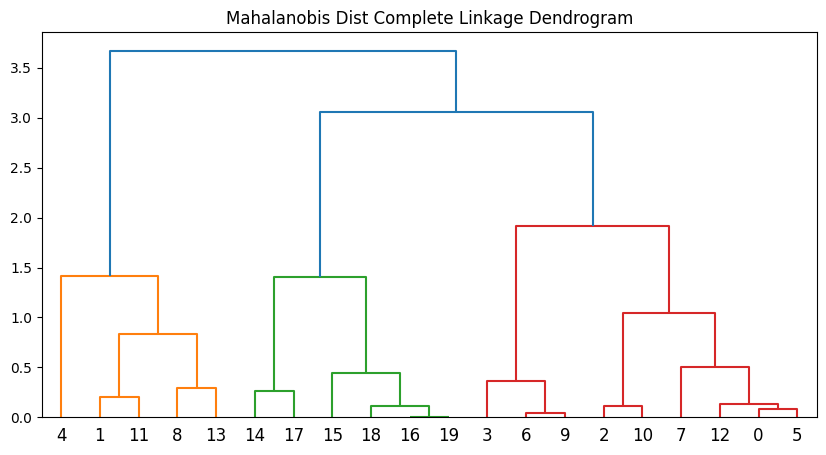

In [180]:
plt.figure(figsize=(10, 5))
plt.title("Mahalanobis Dist Complete Linkage Dendrogram")

mah_clusters = shc.linkage(task4_data, 
            method='complete', # 'complete' - алгоритм "далекого сусіди"
            metric='mahalanobis') # 'mahalanobis' - відстань Маланобіса
shc.dendrogram(Z=mah_clusters)
plt.show()

Як бачимо, використання відстані Маланобіса найкраще відділяє кластери, коли дані не дуже чітко розділені, адже лише з використанням відстані Маланобіса вдалося виділити 3 кластери, а не 2

### Висновки


Під час виконання роботи, з допомогою Python було проведено обчислення евклідової, квадратичної евклідової, манхеттенівської та степеневої (p = 2, r = 3) мір відстані для згенерованого наброру даних, було побудовано дендрограми з використанням евклідової, квадратичної евклідової, манхеттенівської, чебишева, канберра, маланобіса та степеневої (p = 2, r = 3) мір відстаней для цього ж набору даних, використовуючи алгоритм середнього зв'язку. Було побудовано матрицю розсіювання.

Для іншого набору даних було побудовано матрицю розсіювання та дендрограми з використанням алгоритмів "близького сусіди" та "далекого сусіди", та мір відстаней: евклідової, манхеттенівської, чебишева, маланобіса для вихідних та нормованих даних.У заданому наборі чітко виділялися 2 кластери і не дуже чітко можна було виділити 3. Лише з використанням міри відстані Маланобіса, вдалося провести кластеризування з отриманням 3, а 2 кластерів